In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# GeoTiff Images
import rasterio
from osgeo import gdal

# Visualisation
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure
from PIL import Image

# Model Building
import ultralytics
from ultralytics import YOLO
import labelme2yolo

# Others
import os
import shutil
import zipfile

%matplotlib inline

In [ ]:
def rename_files(directory_path, prefix):
    # Define the directory path where your files are located
    directory_path = directory_path
    
    # Get a list of all files in the directory
    files = os.listdir(directory_path)
    
    # Loop through each file in the directory
    for filename in files:
        # Check if the item is a file (not a directory)
        if os.path.isfile(os.path.join(directory_path, filename)):
            # Replace the word "tile" with the prefix of choice
            new_filename = filename.replace("tile", prefix)
    
            # Construct the full path to the original and new files
            old_filepath = os.path.join(directory_path, filename)
            new_filepath = os.path.join(directory_path, new_filename)
    
            # Rename the file
            os.rename(old_filepath, new_filepath)
    
    print("Files renamed successfully.")

In [ ]:
rename_files("../ALL_DATA", "Pre")

In [2]:
!labelme2yolo --json_dir T:/EY_Challenge/EY_Challenge/ALL_DATA
!labelme2yolo --json_dir ./Annotated_Data

INFO:labelme2yolo:Converting train set ...

100%|██████████| 50/50 [00:03<00:00, 12.78it/s]
INFO:labelme2yolo:Converting val set ...

100%|██████████| 12/12 [00:00<00:00, 12.76it/s]
INFO:labelme2yolo:Converting test set ...

0it [00:00, ?it/s]
0it [00:00, ?it/s]
INFO:labelme2yolo:Converting train set ...

0it [00:00, ?it/s]
0it [00:00, ?it/s]
INFO:labelme2yolo:Converting val set ...

0it [00:00, ?it/s]
0it [00:00, ?it/s]
INFO:labelme2yolo:Converting test set ...

0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [2]:
#Loading the model
model = YOLO('yolov8n.pt')
# Display model information (optional)
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [3]:
# Train the model on the dataset for 50 epochs
results = model.train(data="../ALL_DATA/YOLODataset/dataset.yaml", epochs=50, imgsz=512)

New https://pypi.org/project/ultralytics/8.1.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.13 🚀 Python-3.9.17 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=../ALL_DATA/YOLODataset/dataset.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

train: Scanning T:\EY_Challenge\EY_Challenge\ALL_DATA\YOLODataset\labels\train... 50 images, 41 backgrounds, 0 corrupt: 100%|██████████| 91/91 [00:00<00:00, 1614.74it/s]

train: New cache created: T:\EY_Challenge\EY_Challenge\ALL_DATA\YOLODataset\labels\train.cache



val: Scanning T:\EY_Challenge\EY_Challenge\ALL_DATA\YOLODataset\labels\val.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to runs\detect\train8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to runs\detect\train8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.68G       1.78       4.07      1.608         66        512: 100%|██████████| 6/6 [00:01<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         12        271       0.01      0.509     0.0189    0.00971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.61G      1.694       3.97       1.49        124        512: 100%|██████████| 6/6 [00:00<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.69it/s]

                   all         12        271     0.0129      0.537      0.106      0.047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.68G      1.514      3.462        1.3        161        512: 100%|██████████| 6/6 [00:00<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.72it/s]

                   all         12        271     0.0133      0.537      0.116     0.0607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.74G      1.596      3.072      1.248        145        512: 100%|██████████| 6/6 [00:00<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.18it/s]

                   all         12        271     0.0155      0.556      0.142      0.082



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.63G      1.566      2.544      1.255        121        512: 100%|██████████| 6/6 [00:00<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.18it/s]

                   all         12        271     0.0398      0.676      0.284      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.75G      1.459       2.28      1.211         95        512: 100%|██████████| 6/6 [00:00<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.61it/s]

                   all         12        271     0.0555      0.792      0.361      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.73G      1.569      2.405      1.282         47        512: 100%|██████████| 6/6 [00:00<00:00, 12.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]

                   all         12        271      0.583      0.104      0.363      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.64G      1.496      1.944      1.204        166        512: 100%|██████████| 6/6 [00:00<00:00, 12.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.91it/s]

                   all         12        271      0.516       0.39      0.407      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.72G       1.49      2.099      1.225         89        512: 100%|██████████| 6/6 [00:00<00:00, 12.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.50it/s]

                   all         12        271      0.495      0.388      0.474      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.71G      1.431      1.943      1.203         64        512: 100%|██████████| 6/6 [00:00<00:00, 12.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.58it/s]

                   all         12        271      0.439      0.407      0.391      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.88G      1.454      1.833      1.198        110        512: 100%|██████████| 6/6 [00:00<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.62it/s]

                   all         12        271      0.467      0.379      0.448      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.72G      1.393      1.758      1.168        162        512: 100%|██████████| 6/6 [00:00<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.57it/s]

                   all         12        271      0.418      0.325      0.397      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.63G      1.445      1.866      1.209        130        512: 100%|██████████| 6/6 [00:00<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.98it/s]

                   all         12        271        0.5      0.388      0.448      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.63G      1.453      1.713      1.235        135        512: 100%|██████████| 6/6 [00:00<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.49it/s]

                   all         12        271      0.407       0.38      0.454      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.63G      1.369      1.777      1.196        215        512: 100%|██████████| 6/6 [00:00<00:00, 13.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.79it/s]

                   all         12        271      0.332      0.353      0.462      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.58G      1.419      1.657      1.183        187        512: 100%|██████████| 6/6 [00:00<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.91it/s]

                   all         12        271      0.344      0.481       0.44      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.76G      1.366      1.653      1.169        126        512: 100%|██████████| 6/6 [00:00<00:00, 13.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.55it/s]

                   all         12        271      0.359      0.487      0.461      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.63G      1.431      1.635      1.214        176        512: 100%|██████████| 6/6 [00:00<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.51it/s]

                   all         12        271      0.363      0.436      0.413      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.71G       1.34      1.556      1.154        107        512: 100%|██████████| 6/6 [00:00<00:00, 13.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.18it/s]

                   all         12        271      0.418      0.533      0.466      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.63G      1.394      1.559      1.206        152        512: 100%|██████████| 6/6 [00:00<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.33it/s]

                   all         12        271      0.569      0.533      0.473      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.72G       1.37      1.533      1.183        106        512: 100%|██████████| 6/6 [00:00<00:00, 13.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         12        271       0.62      0.536      0.557       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.73G       1.37      1.642      1.207        132        512: 100%|██████████| 6/6 [00:00<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]

                   all         12        271      0.661       0.53      0.521      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.74G      1.413      1.503      1.167         97        512: 100%|██████████| 6/6 [00:00<00:00, 13.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.47it/s]

                   all         12        271      0.564      0.498      0.497       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.73G      1.371      1.438      1.135        151        512: 100%|██████████| 6/6 [00:00<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.88it/s]

                   all         12        271       0.61      0.569      0.593       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.74G      1.408      1.407        1.2        226        512: 100%|██████████| 6/6 [00:00<00:00, 12.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.19it/s]

                   all         12        271      0.484      0.538      0.535      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.62G      1.351      1.431      1.156        142        512: 100%|██████████| 6/6 [00:00<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.05it/s]

                   all         12        271      0.497      0.552      0.436      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.62G      1.245      1.486      1.167        153        512: 100%|██████████| 6/6 [00:00<00:00, 13.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.90it/s]

                   all         12        271      0.469      0.549       0.43       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.73G      1.325      1.372      1.133        194        512: 100%|██████████| 6/6 [00:00<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.49it/s]

                   all         12        271      0.384      0.659      0.464      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.74G      1.287      1.395      1.119        118        512: 100%|██████████| 6/6 [00:00<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.70it/s]

                   all         12        271      0.421       0.53      0.464      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.72G      1.264      1.493      1.158         69        512: 100%|██████████| 6/6 [00:00<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all         12        271      0.421      0.465      0.481      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.73G      1.287        1.4      1.165        134        512: 100%|██████████| 6/6 [00:00<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.31it/s]

                   all         12        271      0.483      0.462      0.436      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.61G       1.25      1.323      1.138        174        512: 100%|██████████| 6/6 [00:00<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.64it/s]

                   all         12        271      0.543      0.534      0.561      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.63G      1.255      1.289      1.126        190        512: 100%|██████████| 6/6 [00:00<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.74it/s]

                   all         12        271      0.585      0.534      0.567       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.71G      1.207       1.34       1.11        140        512: 100%|██████████| 6/6 [00:00<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all         12        271      0.476      0.518      0.456      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.74G      1.296      1.324      1.136        125        512: 100%|██████████| 6/6 [00:00<00:00, 13.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]

                   all         12        271      0.461      0.631      0.488      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.74G      1.276       1.24      1.121        156        512: 100%|██████████| 6/6 [00:00<00:00, 12.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.70it/s]

                   all         12        271      0.595      0.561      0.536       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.63G      1.283      1.337      1.145        156        512: 100%|██████████| 6/6 [00:00<00:00, 13.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.86it/s]

                   all         12        271      0.626      0.589      0.557      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.74G      1.163        1.2      1.083        136        512: 100%|██████████| 6/6 [00:00<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.33it/s]

                   all         12        271      0.565       0.69      0.566      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.63G      1.183      1.241      1.104        102        512: 100%|██████████| 6/6 [00:00<00:00, 13.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]

                   all         12        271      0.587      0.611       0.57      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       1.7G      1.227      1.225        1.1        230        512: 100%|██████████| 6/6 [00:00<00:00, 12.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.80it/s]

                   all         12        271      0.558      0.594      0.551      0.303


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.63G       1.16      1.646      1.088         14        512: 100%|██████████| 6/6 [00:00<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.69it/s]

                   all         12        271      0.512      0.561      0.529      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.63G      1.226      1.391       1.09         94        512: 100%|██████████| 6/6 [00:00<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]

                   all         12        271      0.473      0.571      0.492      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.63G      1.224      1.361      1.131         39        512: 100%|██████████| 6/6 [00:00<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.87it/s]

                   all         12        271      0.477      0.438      0.469      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.73G      1.194      1.317      1.101         56        512: 100%|██████████| 6/6 [00:00<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.19it/s]

                   all         12        271      0.564      0.436      0.476      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.64G      1.168      1.425        1.1         77        512: 100%|██████████| 6/6 [00:00<00:00, 14.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.19it/s]

                   all         12        271       0.47      0.485      0.469      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.64G      1.133      1.362      1.075        177        512: 100%|██████████| 6/6 [00:00<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.54it/s]

                   all         12        271      0.625      0.443      0.501      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.73G      1.092      1.288      1.048         47        512: 100%|██████████| 6/6 [00:00<00:00, 13.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.42it/s]

                   all         12        271       0.62      0.434      0.538      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.65G      1.122      1.292      1.082         51        512: 100%|██████████| 6/6 [00:00<00:00, 13.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.41it/s]

                   all         12        271      0.471      0.631      0.562       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.64G      1.153      1.243      1.077         80        512: 100%|██████████| 6/6 [00:00<00:00, 14.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.99it/s]

                   all         12        271        0.5      0.661      0.547      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.65G       1.16      1.166      1.086        125        512: 100%|██████████| 6/6 [00:00<00:00, 13.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.60it/s]

                   all         12        271      0.556       0.65      0.558      0.328



50 epochs completed in 0.020 hours.
Optimizer stripped from runs\detect\train8\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train8\weights\best.pt, 6.2MB

Validating runs\detect\train8\weights\best.pt...
Ultralytics YOLOv8.1.13 🚀 Python-3.9.17 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]


                   all         12        271      0.501      0.611      0.568       0.33
undamagedcommercialbuilding         12         38      0.592      0.684      0.656      0.459
undamagedresidentialbuilding         12        227      0.609      0.648      0.635       0.29
damagedcommercialbuilding         12          6      0.303        0.5      0.413      0.241
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\detect\train8


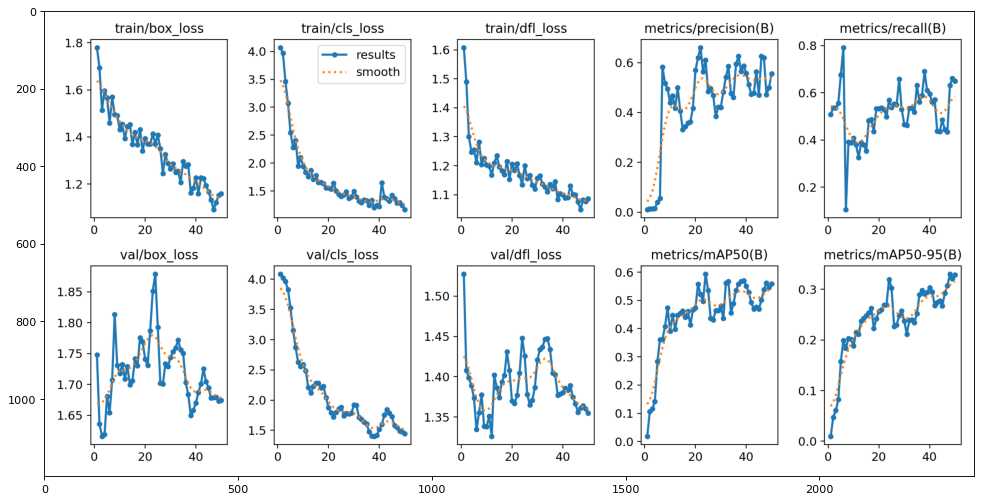

In [4]:
figure(figsize=(15, 10), dpi=80)
# reading the image 
results = img.imread("../Rough Work/runs/detect/train8/results.png")   
# displaying the image 
plt.imshow(results) 

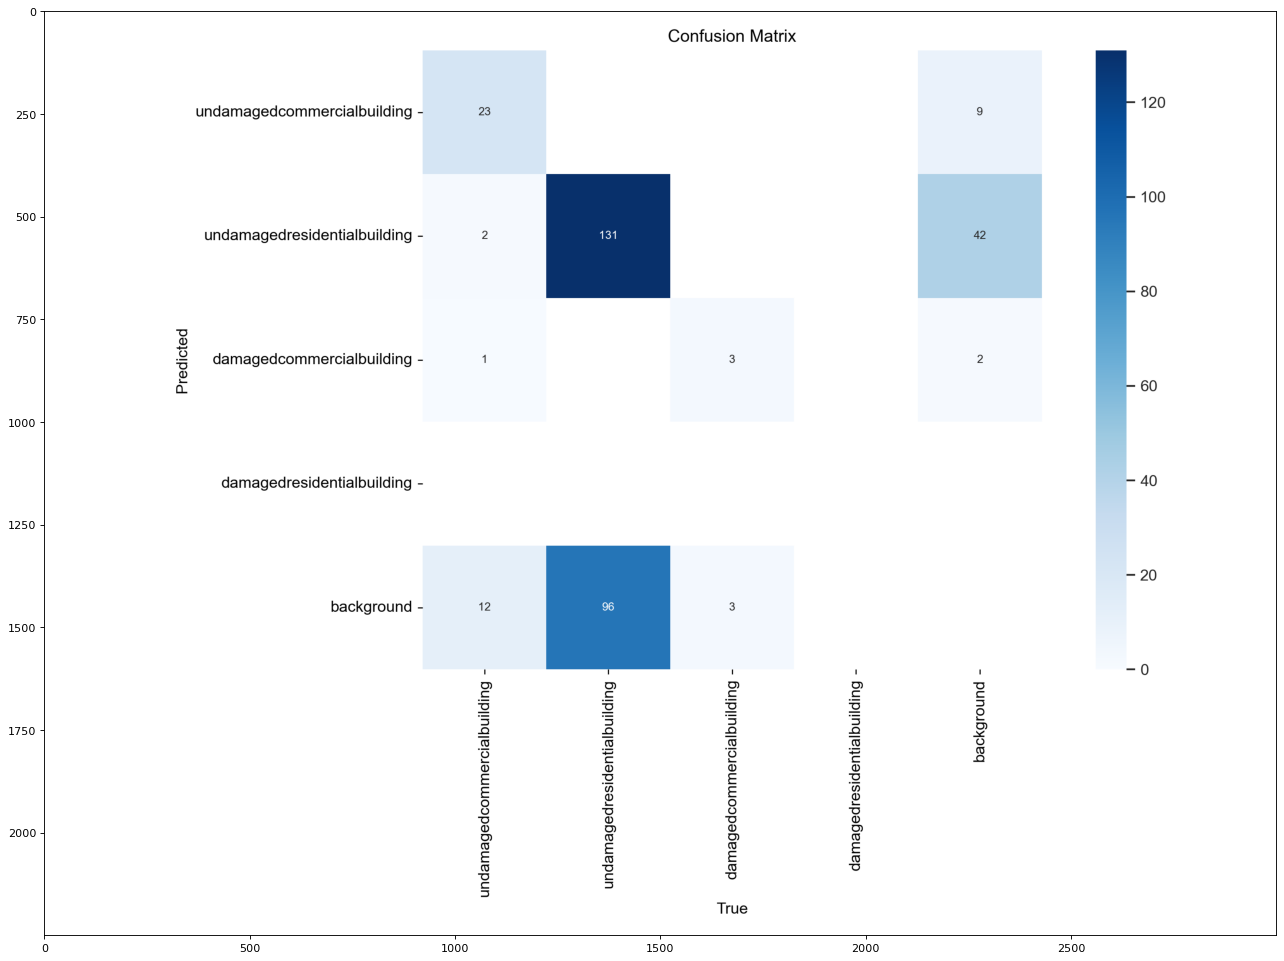

In [5]:
figure(figsize=(20,15), dpi=80)  
# reading the image 
cf = img.imread("../Rough Work/runs/detect/train8/confusion_matrix.png") 
# displaying the image 
plt.imshow(cf) 

# Making Predictions

In [6]:
model = YOLO('runs/detect/train8/weights/best.pt')

In [ ]:
print("Current working directory: ", os.getcwd())

In [ ]:
def unzip_folder(zip_filepath, dest_dir):
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        zip_ref.extractall(dest_dir)
    print(f'The zip file {zip_filepath} has been extracted to the directory {dest_dir}')



submission_zip = './challenge_1_submission_images.zip'
submission_directory = './challenge_1_submission_images'
unzip_folder(submission_zip,submission_directory)

In [7]:
# Decoding according to the .yaml file class names order
decoding_of_predictions ={0: 'undamagedcommercialbuilding', 1: 'undamagedresidentialbuilding', 3: 'damagedresidentialbuilding', 2: 'damagedcommercialbuilding'}

directory = './challenge_1_submission_images/Validation_Data_JPEG'
# Directory to store outputs
results_directory = 'Validation_Data_Results'

# Create submission directory if it doesn't exist
if not os.path.exists(results_directory):
    os.makedirs(results_directory)

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the current object is a file and ends with .jpeg
    if os.path.isfile(os.path.join(directory, filename)) and filename.lower().endswith('.jpg'):
        # Perform operations on the file
        file_path = os.path.join(directory, filename)
        print(file_path)
        print("Making a prediction on ", filename)
        results = model.predict(file_path, save=True, iou=0.5, save_txt=True, conf=0.25)
        
        for r in results:
            conf_list = r.boxes.conf.cpu().numpy().tolist()  # Move tensor to CPU before converting
            clss_list = r.boxes.cls.cpu().numpy().tolist()  # Move tensor to CPU before converting
            original_list = clss_list
            updated_list = []
            for element in original_list:
                updated_list.append(decoding_of_predictions[int(element)])

        bounding_boxes = r.boxes.xyxy.cpu().numpy()  # Move tensor to CPU before converting
        confidences = conf_list
        class_names = updated_list


        # Check if bounding boxes, confidences and class names match
        if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
            print("Error: Number of bounding boxes, confidences, and class names should be the same.")
            continue
        text_file_name = os.path.splitext(filename)[0]
        # Creating a new .txt file for each image in the submission_directory
        with open(os.path.join(results_directory, f"{text_file_name}.txt"), "w") as file:
            for i in range(len(bounding_boxes)):
                # Get coordinates of each bounding box
                left, top, right, bottom = bounding_boxes[i]
                # Write content to file in desired format
                file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
        print("Output files generated successfully.")


./challenge_1_submission_images/Validation_Data_JPEG\Validation_Post_Event_001.jpg
Making a prediction on  Validation_Post_Event_001.jpg

image 1/1 t:\EY_Challenge\EY_Challenge\Rough Work\challenge_1_submission_images\Validation_Data_JPEG\Validation_Post_Event_001.jpg: 512x512 1 undamagedcommercialbuilding, 11 damagedcommercialbuildings, 13 damagedresidentialbuildings, 12.2ms
Speed: 1.0ms preprocess, 12.2ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs\detect\predict2
1 label saved to runs\detect\predict2\labels
Output files generated successfully.
./challenge_1_submission_images/Validation_Data_JPEG\Validation_Post_Event_002.jpg
Making a prediction on  Validation_Post_Event_002.jpg

image 1/1 t:\EY_Challenge\EY_Challenge\Rough Work\challenge_1_submission_images\Validation_Data_JPEG\Validation_Post_Event_002.jpg: 512x512 4 damagedcommercialbuildings, 5 damagedresidentialbuildings, 8.5ms
Speed: 2.2ms preprocess, 8.5ms inference, 2.0ms postprocess

In [8]:
# Define your source directory and the destination where the zip file will be created
source_dir = results_directory
destination_zip = 'submission'

# Create a zip file from the directory
shutil.make_archive(destination_zip, 'zip', source_dir)

print(f"Directory {source_dir} has been successfully zipped into {destination_zip}.")

Directory Validation_Data_Results has been successfully zipped into submission.
